In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import emcee

In [4]:
def init_board(L):
    return npr.choice([-1,1],size=(L,L))

In [21]:
def sum_neighbor(board,i,j):
    dirs = [(1,0), (-1,0), (0,1), (0,-1)]
    res = 0
    for x,y in dirs:
        ix, iy = (i+x)%L, (i+y)%L
        res += board[ix, iy]
    return res

In [35]:
def gibb_gen(board, i, j, beta,k=None,N=None):
    nb_sum = sum_neighbor(board,i,j)
    a = np.exp(beta*nb_sum)
    b = np.exp(-beta*nb_sum)
    wp = a/(a+b)
    sigma = (np.random.rand() < wp) * 2 - 1
    return sigma

In [36]:
def met_gen(board, i, j, beta,k=None, N=None):
    res = -board[i][j]
    nsum = sum_neighbor(board, i, j)
    ratio = np.exp(-4*beta*board[i,j]*nsum)
    return res * (ratio > np.random.rand())

In [37]:
def jarz_gen(board, i, j, beta,k,N):
    nb_sum = sum_neighbor(board,i,j)
    a = np.exp(beta*nb_sum*k/N)
    b = np.exp(-beta*nb_sum*k/N)
    wp = a/(a+b)
    sigma = (np.random.rand() < wp) * 2 - 1
    return sigma

In [38]:
def plot_mag(mag):
    plt.hist(mag,bins=20)
    plt.title("Histogram of magnetization")
    plt.xlabel("Magnetization")
    plt.ylabel("Frequency")
    plt.show()

In [42]:
gen_dict = {"gibb":gibb_gen, "met":met_gen, "jarz":jarz_gen}

def sampling(beta, L, itermax, generater):
    gen = gen_dict[generater]
    board = init_board(L)
    magnet = np.zeros(itermax)
    for _ in range(itermax):
        i,j = npr.randint(L, size=2)
        board[i,j] = gen(board,i,j,beta,_,itermax)
        magnet[_] = board.sum() / L**2
    plot_mag(magnet)
    iac = emcee.autocorr.integrated_time(magnet)
    print(f"integrated autocorrelation time {iac[0]:.4f}")

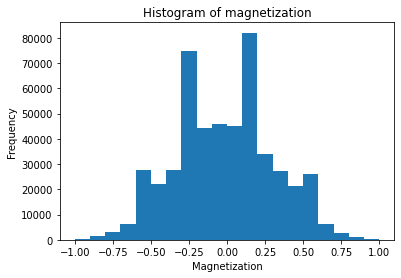

integrated autocorrelation time 120.8732


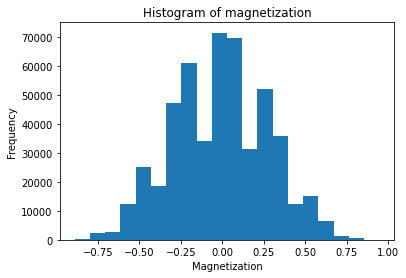

integrated autocorrelation time 194.7910


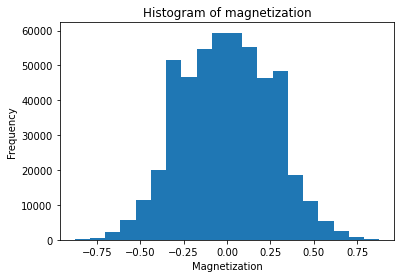

integrated autocorrelation time 248.3930


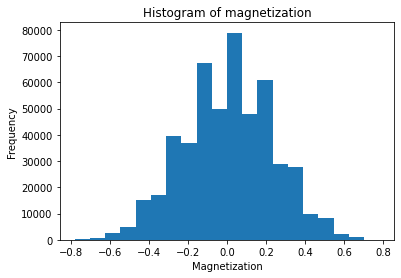

integrated autocorrelation time 352.0098


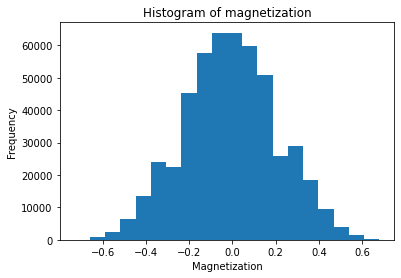

integrated autocorrelation time 544.9284


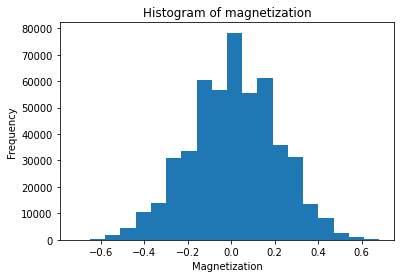

integrated autocorrelation time 586.0448


In [46]:
_L = [5,6,7,8,9,10]
T = 6.0
itermax = 500000
beta = 1/T
for L in _L:
    sampling(beta, L, itermax, "gibb")

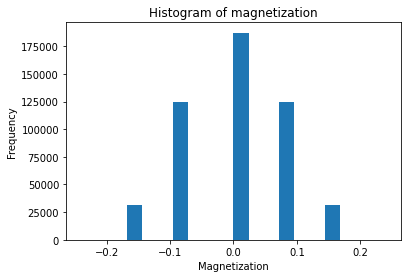

integrated autocorrelation time 24.2511


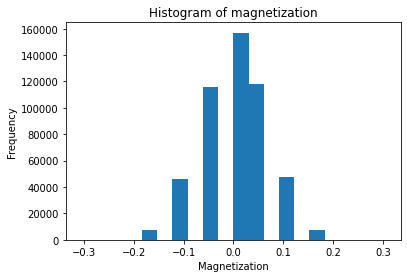

integrated autocorrelation time 34.4877


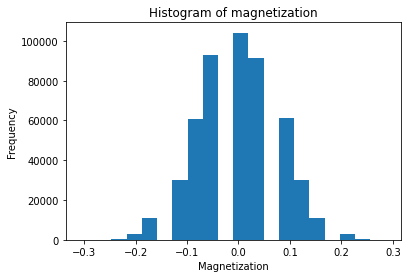

integrated autocorrelation time 51.5646


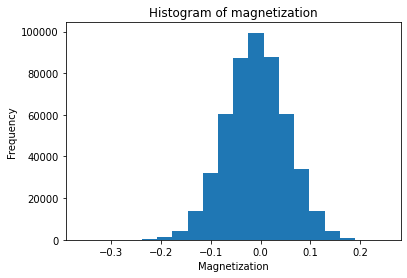

integrated autocorrelation time 61.6178


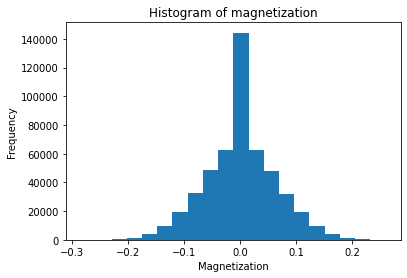

integrated autocorrelation time 81.1164


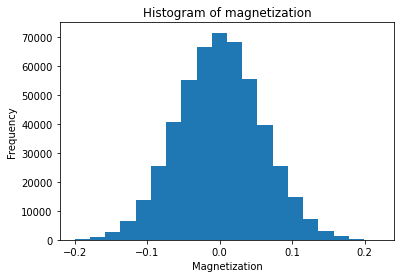

integrated autocorrelation time 98.1218


In [47]:
_L = [5,6,7,8,9,10]
T = 6.0
itermax = 500000
beta = 1/T
for L in _L:
    sampling(beta, L, itermax, "met")

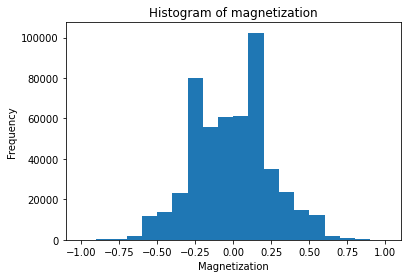

integrated autocorrelation time 95.9658


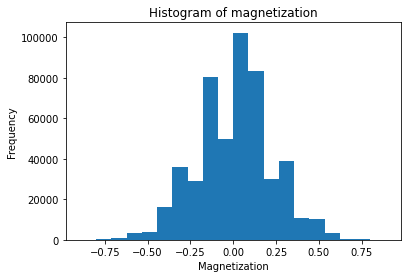

integrated autocorrelation time 130.9050


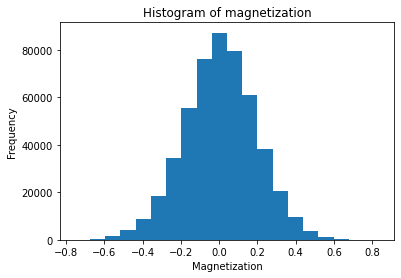

integrated autocorrelation time 240.9607


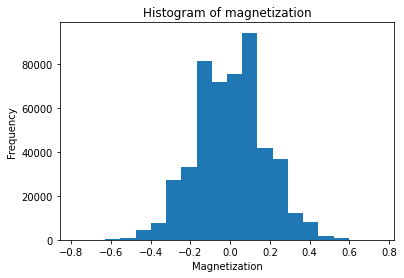

integrated autocorrelation time 271.3058


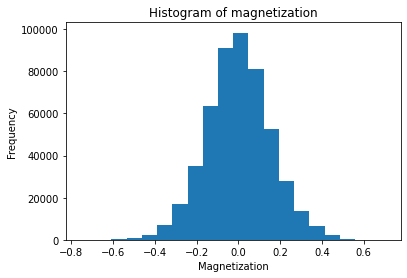

integrated autocorrelation time 369.7358


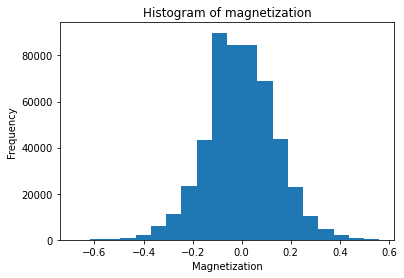

integrated autocorrelation time 341.0903


In [48]:
_L = [5,6,7,8,9,10]
T = 6.0
itermax = 500000
beta = 1/T
for L in _L:
    sampling(beta, L, itermax, "jarz")